In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [2]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_cart, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

02/01/2019 to 27/07/2020
data: (390, 71)
pairs: (1931, 12)


In [5]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,120,ABEV3,AZUL4,-4.492055,99,0.139830,2,0.656648,0.677034,Short/Long,2,"100,120"
1,120,ABEV3,B3SA3,-3.185593,95,0.216440,4,0.601944,0.245544,Long/Short,2,"100,120"
2,250,ABEV3,BBAS3,-3.577773,99,0.228807,8,0.568492,1.187218,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,ABEV3,BBDC3,-3.137722,95,0.346589,10,0.603676,1.070341,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,ABEV3,BBDC4,-3.222016,95,0.360251,10,0.596267,0.968060,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,250,VALE3,VVAR3,-3.255892,95,1.195253,8,0.529575,0.023595,Long/Short,6,"100,120,200,220,240,250"
1927,100,VALE3,WEGE3,-4.087504,99,0.198618,2,0.460883,0.836821,Long/Short,1,100
1928,220,VIVT4,VVAR3,-3.010566,95,0.610711,9,0.447643,0.543974,Long/Short,6,"100,120,140,160,180,220"
1929,250,VIVT4,WEGE3,-2.995292,95,0.340298,11,0.324414,1.019074,Long/Short,9,"100,120,140,160,180,200,220,240,250"


In [6]:
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,EGIE3,TIMP3,-5.239610,99,2.309412,4,0.566966,1.113113,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,ENBR3,FLRY3,-4.780986,99,0.494233,4,0.678851,1.070353,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,BBAS3,FLRY3,-4.302893,99,1.618557,5,0.670532,1.101204,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,GOAU4,IGTA3,-4.195154,99,0.230421,5,0.615686,1.054078,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,ABEV3,GOLL4,-3.531278,99,0.220211,6,0.642164,1.174422,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,250,ABEV3,USIM5,-4.034196,99,0.949559,6,0.502882,1.091604,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,BBAS3,IGTA3,-4.399783,99,0.859909,6,0.753046,1.006233,Short/Long,9,"100,120,140,160,180,200,220,240,250"
7,250,BRML3,GGBR4,-3.791707,99,0.778435,6,0.625007,1.096919,Long/Short,9,"100,120,140,160,180,200,220,240,250"
8,250,CIEL3,FLRY3,-3.983856,99,0.220338,6,0.489142,1.178070,Short/Long,9,"100,120,140,160,180,200,220,240,250"
9,250,ENBR3,TIMP3,-4.060211,99,1.052603,6,0.619470,1.108673,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [8]:
#plot_pairs(pairs_signal, data)

In [9]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [10]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [11]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,BBAS3,TAEE11,-4.824291,99,3.638531,5,0.602430,1.029805,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"


In [12]:
"""oper.drop(2, inplace=True)
new = pairs_signal.iloc[[1]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"oper.drop(2, inplace=True)\nnew = pairs_signal.iloc[[1]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [13]:
#oper.to_csv('datasets/operations.csv', index=False)

In [14]:
#mult.residue(data['CMIG4'], data['ENGI11'], 250)

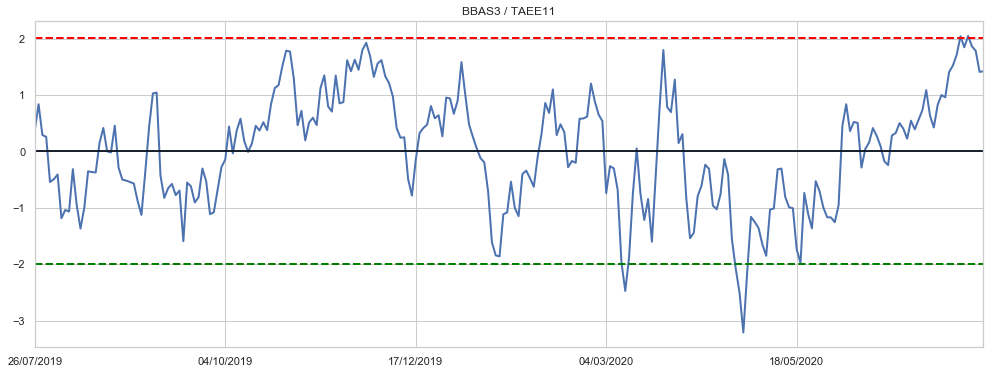

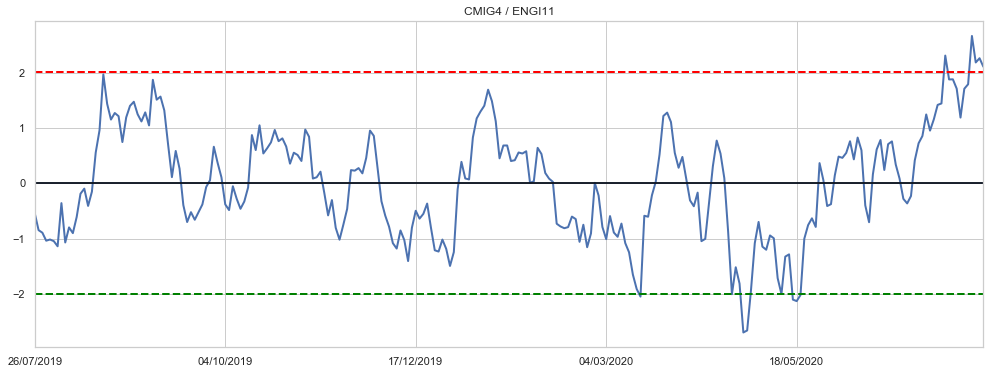

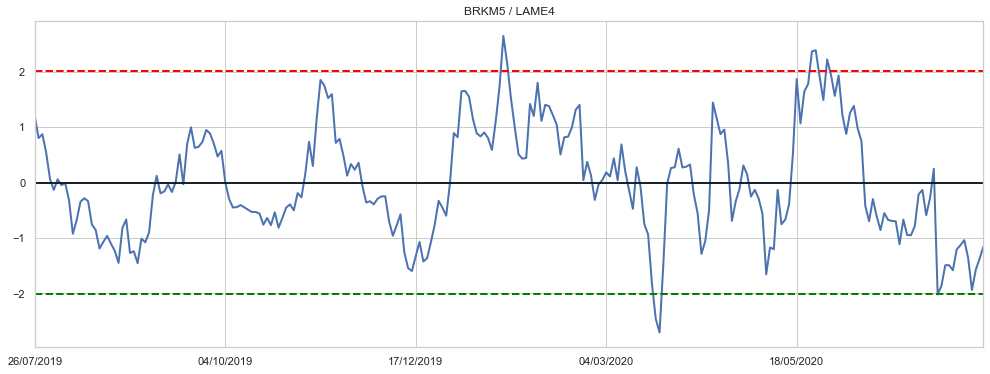

In [15]:
plot_pairs(oper, data)

            BRKM5  LAME4
Data                    
20/07/2020  25.11  35.33


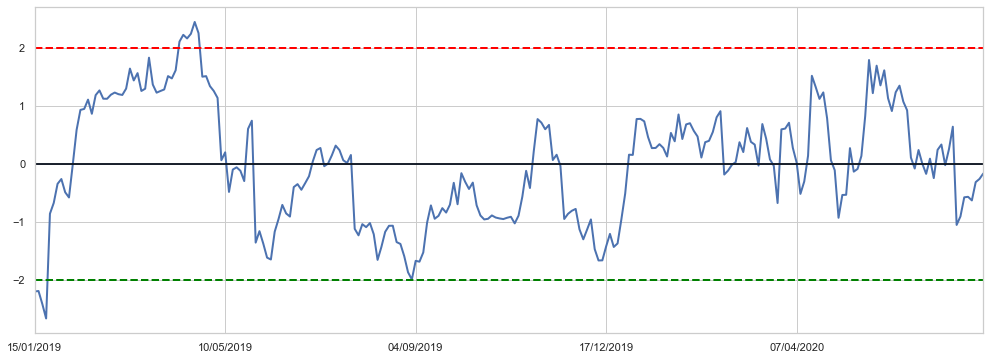

In [16]:
y_symbol = 'BRKM5'
x_symbol = 'LAME4'
df = data[data.index <= '2020-05-22']
df = data[data.index <= '2020-06-15']
df[[y_symbol, x_symbol]]

df = df[[y_symbol, x_symbol]]
print(df.iloc[0:1])

mult.plot_residue(mult.residue(df[y_symbol], df[x_symbol], 250))

In [130]:
mult.summary(df, y_symbol, x_symbol, 250)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Período de Análise                   250   Entrada       Venda:BRKM5 / Compra:LAME4
Independente                       BRKM5   Dependente                         LAME4
R$                                 25.99   R$                                 25.35
Ratio                  1.025246523866574   
→ CASH NEUTRAL ←
BRKM5                           -97.5375   Financeiro R$                 -2534.9996
LAME4                                100   Financeiro R$                     2535.0
                                                                             0.0004
→ BETA NEUTRAL ←
LAME4                                124   Financeiro R$                     3143.4
BRKM5                               -100   Financeiro R$                    -2599.0
                                                                              544.4
Somente para operação Beta Neutral:
Retorno  (%)          25.071425068903718   Gain                   625.4422906305476
Atual    (%)           24.06472859324844   Los

In [117]:
#df.to_excel('datasets/data_cart.xlsx')

In [66]:
stop_loss = loss_own(data['BBAS3'], data['TAEE11'], 100, 250)
take_profit = gain_own(data['BBAS3'], data['TAEE11'], 100, 250)
print('Stop Loss: {}; Take Profit: {}'.format(stop_loss, take_profit))

Stop Loss: -322.0; Take Profit: 551.0


In [49]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    mult.summary(data, y_symbol, x_symbol, 250)

Período de Análise                   250   Entrada                              Não
Independente                       BBAS3   Dependente                        TAEE11
R$                                  35.2   R$                                 28.32
Ratio                 1.2429378934411721   
Somente para operação Beta Neutral:
Retorno  (%)          15.551543937359158   Gain                   541.9774642487017
Atual    (%)           15.39708671879707   Loss                 -301.07789715295047
Loss     (%)          -8.553349165547242                                           
Dickey Fuller         -4.284447569174962   Meia Vida                              5
ADF                                   99   Correlação  (%)       60.290289515590246
p-value            0.0004725806787461562   Inverter                            True
                                           Beta                   3.689942666970473
Ratio Entrada         1.2452112414550651   
Ratio Saída           1.051561668127

In [50]:
testdf = data[data.index < '2020-07-13'].copy()

In [51]:
"""y_symbol = 'ELET3'
x_symbol = 'PCAR3'"""

"""y_symbol = 'CMIG4'
x_symbol = 'ENGI11'"""

y_symbol = 'BRKM5'
x_symbol = 'LAME4'

y = testdf[y_symbol]
x = testdf[x_symbol]

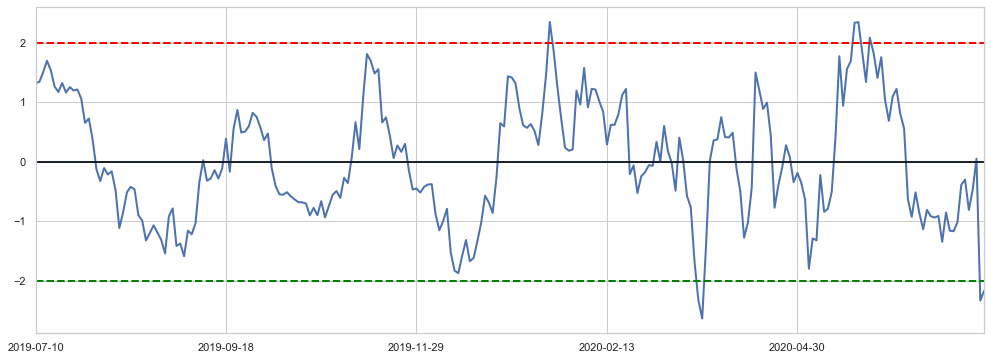

In [52]:
mult.plot_residue(mult.residue(y, x, 250))

In [53]:
def loss_own(y, x, volume, period, desv_stop=3.1, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_stop_loss, residue = loss_own_residue(y_test, x_test, period, desv_stop=desv_stop, y_short=y_short)
    return -abs(((price_input_test*volume)-(price_stop_loss*volume)))

def loss_own_residue(y, x, period, desv_stop=3.1, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price + penny
        else:
            y_test[0] = last_price - penny

        residue = mult.zscore(mult.residue(y_test, x_test, period))
        if(abs(residue[0]) >= desv_stop):
            break
    return y_test[0], residue

def gain_own(y, x, volume, period, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_take_profit, residue = gain_own_residue(y_test, x_test, period, y_short=y_short)
    return abs(((price_input_test*volume)-(price_take_profit*volume)))

def gain_own_residue(y, x, period, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price - penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] <= 0):
                break
        else:
            y_test[0] = last_price + penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] >= 0):
                break

    return y_test[0], residue

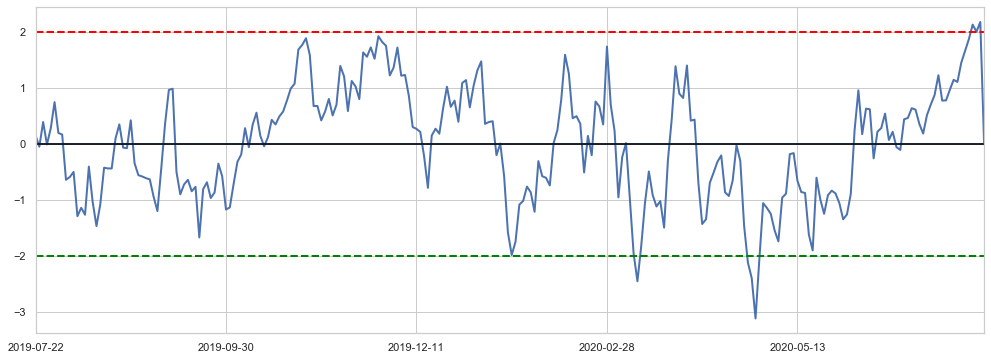

In [54]:
y_rest, resid = gain_own_residue(data['BBAS3'], data['TAEE11'], 250)
mult.plot_residue(resid)

In [55]:
y_test = y.copy()
x_test = x.copy()

In [56]:
loss_own(y, x, volume=200, period=250, desv_stop=3.1, y_short=False)

-464.0

In [57]:
mult.loss(y, x, 200, 250, desv_stop=3.1)

-567.0077772477688

In [58]:
y_other, resid = loss_own_residue(y, x, 100, desv_stop=3.1, y_short=False)
y_other, y[0], abs(y[0]-y_other)

(20.08000038146973, 23.60000038146973, 3.5199999999999996)

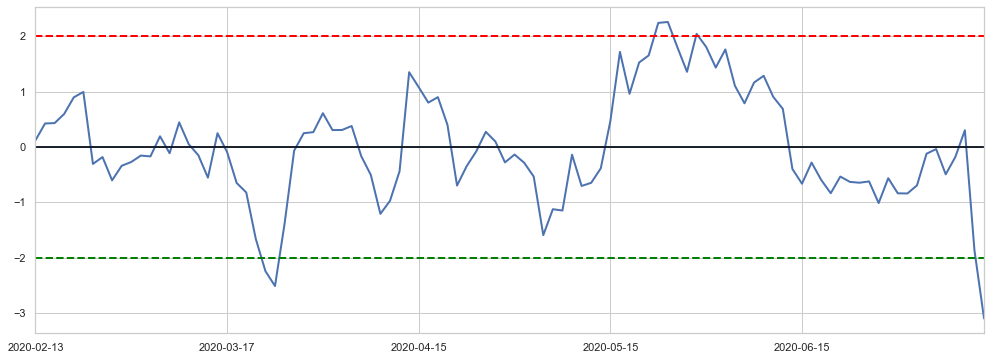

In [59]:
mult.plot_residue(resid)

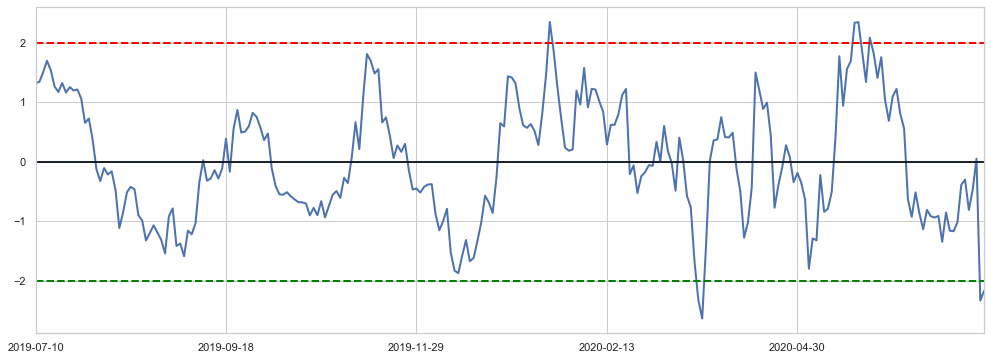

In [60]:
mult.plot_residue(mult.residue(y_test, x_test, 250))

In [61]:
type(y_test.as_matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [62]:
y_test = y
x_test = x

price_start = y_test[0]
y_test[0]=40
print('start: {}, simu: {}, x_fixed: {}'.format(price_start, y_test[0], x_test[0]))

start: 23.60000038146973, simu: 40.0, x_fixed: 35.15999984741211


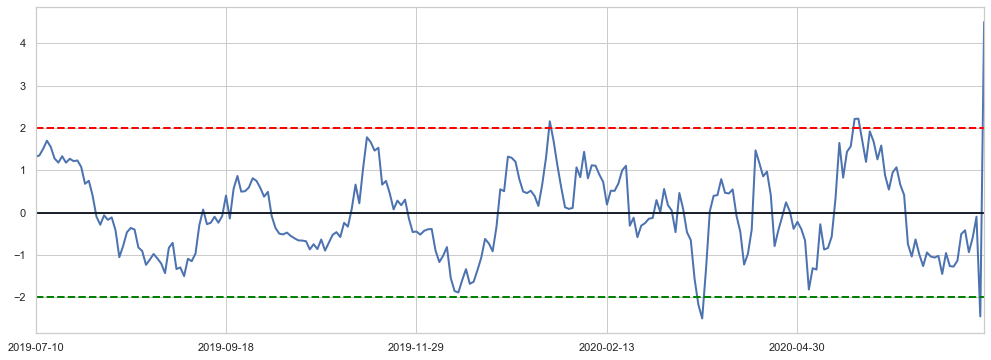

In [63]:
mult.plot_residue(mult.residue(y_test, x_test, 250))

In [64]:
mult.summary(testdf, y_symbol, x_symbol, 250, y_volume=100)

Período de Análise                   250   Entrada       Venda:BRKM5 / Compra:LAME4
Independente                       BRKM5   Dependente                         LAME4
R$                                  40.0   R$                                 35.16
Ratio                 1.1376564326960352   
→ CASH NEUTRAL ←
BRKM5                              -87.9   Financeiro R$                    -3516.0
LAME4                                100   Financeiro R$                     3516.0
                                                                                0.0
→ BETA NEUTRAL ←
LAME4                                123   Financeiro R$                    4324.68
BRKM5                               -100   Financeiro R$                    -4000.0
                                                                             324.68
Somente para operação Beta Neutral:
Retorno  (%)           16.60810599126552   Gain                   244.1771882733379
Atual    (%)           6.104429706833447   Los

In [65]:
"""excel = testdf.copy()
excel.to_excel('datasets/data_cart.xlsx')"""

"excel = testdf.copy()\nexcel.to_excel('datasets/data_cart.xlsx')"